In this project we will use a dataset from [kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction) to analyse what factors are most impactful on employees leaving the Sailfort Motors' company. We start by describing the data sets columns:

$\textbf{Description of dataset columns}$

$\textbf{satisfaction_level:}$ Employee-reported job satisfaction level [0-1]

$\textbf{last_evaluation:}$ Score of employees last performance review [0-1]

$\textbf{number_project:}$ Number of projects employee contributes to

$\textbf{average_monthly_hours:}$ Average number of hours employee worked per month

$\textbf{time_spend_company:}$ How long the employee has been with the company (years)

$\textbf{Work_accident:}$ Whether or not the employee experienced an accident while at work (0=False,1=True)

$\textbf{left:}$ Whether or not the employee left the company (0=False,1=True)

$\textbf{promotion_last_5years:}$ Whether or not the employee was promoted the last 5 years (0=False,1=True)

$\textbf{Department:}$ The employee’s department

$\textbf{salary:}$ The employee’s salary (U.S. dollars)


We then import the data set using the pandas package

In [1]:
import pandas as pd

In [2]:
df0 = pd.read_csv("data_sets/archive/HR_comma_sep.csv")

Next print the first lines of the data set to familiarize us with it

In [3]:
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


We start looking at the naming of the columns. It is not standaraized, which might be a problem in the future. To fix this we update all column names to the following format: "something_somethingelse_other", where spaces " " are switched with underscores "_" and all writing is in lower case

In [4]:
#Copy original dataframe
df_cleaned = df0.copy()

#Rename columns that are not in the format explained above
df_cleaned = df_cleaned.rename(columns={"Work_accident":"work_accident"
                                        ,"Department":"department"
                                        ,"promotion_last_5years":"promotion_last_5_years"
                                        ,"average_montly_hours":"average_monthly_hours"
                                        ,"number_project":"number_projects" })

#Check that changes came through by displaying columns:
list(df_cleaned.columns)

['satisfaction_level',
 'last_evaluation',
 'number_projects',
 'average_monthly_hours',
 'time_spend_company',
 'work_accident',
 'left',
 'promotion_last_5_years',
 'department',
 'salary']

Just to be clear, we then update the column descriptions:


$\textbf{satisfaction_level:}$ Employee-reported job satisfaction level [0-1]

$\textbf{last_evaluation:}$ Score of employees last performance review [0-1]

$\textbf{number_project:}$ Number of projects employee contributes to

$\textbf{average_monthly_hours:}$ Average number of hours employee worked per month

$\textbf{time_spend_company:}$ How long the employee has been with the company (years)

$\textbf{work_accident:}$ Whether or not the employee experienced an accident while at work (0=False,1=True)

$\textbf{left:}$ Whether or not the employee left the company (0=False,1=True)

$\textbf{promotion_last_5_years:}$ Whether or not the employee was promoted the last 5 years (0=False,1=True)

$\textbf{department:}$ The employee’s department

$\textbf{salary:}$ The employee’s salary (U.S. dollars)

Next, we check formating. We do so with the .info() function

In [5]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      14999 non-null  float64
 1   last_evaluation         14999 non-null  float64
 2   number_projects         14999 non-null  int64  
 3   average_monthly_hours   14999 non-null  int64  
 4   time_spend_company      14999 non-null  int64  
 5   work_accident           14999 non-null  int64  
 6   left                    14999 non-null  int64  
 7   promotion_last_5_years  14999 non-null  int64  
 8   department              14999 non-null  object 
 9   salary                  14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Formatting looks reasonable, and there are no missing values. However, we might want to consider to encode the salaray to a number between 0 and 2 (0="low", 1="medium", 2="high") for use later, so let us do that:


In [6]:
#Rename salary values to an integer between 0 and 2
df_cleaned_encoded = df_cleaned.replace({"low":0,"medium":1,"high":2})
#Show values in salary column to check that we replaced all
set(df_cleaned_encoded["salary"])

{0, 1, 2}

It could be a good idea to do the same for department. First check how many different departments there are:

In [7]:
set(df_cleaned_encoded["department"])

{'IT',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sales',
 'support',
 'technical'}

We further want to do a similar thing as we did for the salary with the departments. However, there is no inherent hirarcy in the depeartments, so we here use 1-hot-encoding:

In [8]:
df_cleaned_encoded = pd.get_dummies(df_cleaned_encoded,columns=["department"],drop_first=True)#pd.get_dummies("detpartment")

#Display a random sample to check the encoding went well
df_cleaned_encoded.sample(10)

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5_years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
374,0.86,0.84,5,254,5,0,1,0,1,0,0,0,0,0,1,0,0,0
7689,0.16,0.78,4,196,5,0,0,0,2,0,0,0,0,0,0,0,0,1
7990,0.60,0.58,2,182,2,0,0,0,1,0,0,0,0,0,0,0,1,0
10377,0.58,0.67,3,156,2,0,0,0,0,1,0,0,0,0,0,0,0,0
8537,0.44,0.83,4,210,2,0,0,0,1,0,0,0,0,0,0,0,0,0
2850,0.91,0.85,4,203,2,0,0,0,0,0,0,0,0,0,0,1,0,0
7057,0.18,0.97,4,206,3,0,0,0,2,0,0,1,0,0,0,0,0,0
8132,0.59,0.90,3,189,2,0,0,0,0,0,0,0,0,0,0,0,0,1
12017,0.78,0.99,4,255,6,0,1,0,0,0,0,0,0,0,0,1,0,0
13774,0.65,0.54,4,147,10,0,0,0,0,0,0,0,0,0,0,1,0,0


We said earlier that there are no missing values. However, just to be sure, lets check:

In [9]:
df_cleaned_encoded.isna().sum()

satisfaction_level        0
last_evaluation           0
number_projects           0
average_monthly_hours     0
time_spend_company        0
work_accident             0
left                      0
promotion_last_5_years    0
salary                    0
department_RandD          0
department_accounting     0
department_hr             0
department_management     0
department_marketing      0
department_product_mng    0
department_sales          0
department_support        0
department_technical      0
dtype: int64

And indeed, there are no missing values. Further, we check for duplicated rows:

In [10]:
print("There are "+str(df_cleaned_encoded.duplicated().sum())+" duplicated rows.")

There are 3008 duplicated rows.


Let us inspect them more thouroughly by displaying 10 of them:

In [11]:
print("Number of rows in the total data set is "+str(df_cleaned_encoded.shape[0]))
print("Number of duplicated rows in the data set is "+str(df_cleaned_encoded.duplicated().sum()))
df_cleaned_encoded[df_cleaned_encoded.duplicated()].sample(10)

Number of rows in the total data set is 14999
Number of duplicated rows in the data set is 3008


,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5_years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
13383,0.67,0.52,4,207,3,0,0,0,1,0,0,0,0,0,0,0,0,0
13894,0.96,0.60,3,160,10,0,0,0,1,0,0,0,0,0,0,0,1,0
12432,0.44,0.51,2,150,3,0,1,0,0,0,0,0,0,0,0,0,1,0
13195,0.99,0.99,4,163,4,0,0,0,1,0,0,0,0,0,1,0,0,0
14339,0.09,0.82,6,250,4,0,1,0,0,0,0,0,0,0,0,0,1,0
13948,0.69,0.66,3,215,6,0,0,0,2,0,0,0,0,0,0,1,0,0
12444,0.39,0.54,2,127,3,0,1,0,0,0,0,0,0,0,0,0,0,0
13438,0.48,0.93,3,150,10,0,0,0,0,0,0,0,0,0,0,0,0,1
13336,0.54,0.83,4,201,8,1,0,0,1,0,0,0,0,0,0,1,0,0
14200,0.90,0.76,3,255,7,0,0,0,0,0,0,0,0,0,1,0,0,0


It seems unlikeley that in a data set of 14999 rows, 3008 of them have the same score in every column. We will thus, for the lack of more information, assume they are in fact duplicates, and can be droped. So let's do that:

In [12]:
df_cleaned_encoded = df_cleaned_encoded.drop_duplicates()

Check that we actually removed duplicates by checking the shape:

In [13]:
df_cleaned_encoded.shape[0]

11991

Since 14999-3008=11991, this is expected, and we continue.

The next thing we check for are outliers in the data. We will do so by creating box plots of the 5 metrics 

"satisfaction_level"

"last_evaluation"

"number_project"

"average_monthly_hours"

"time_spend_company"

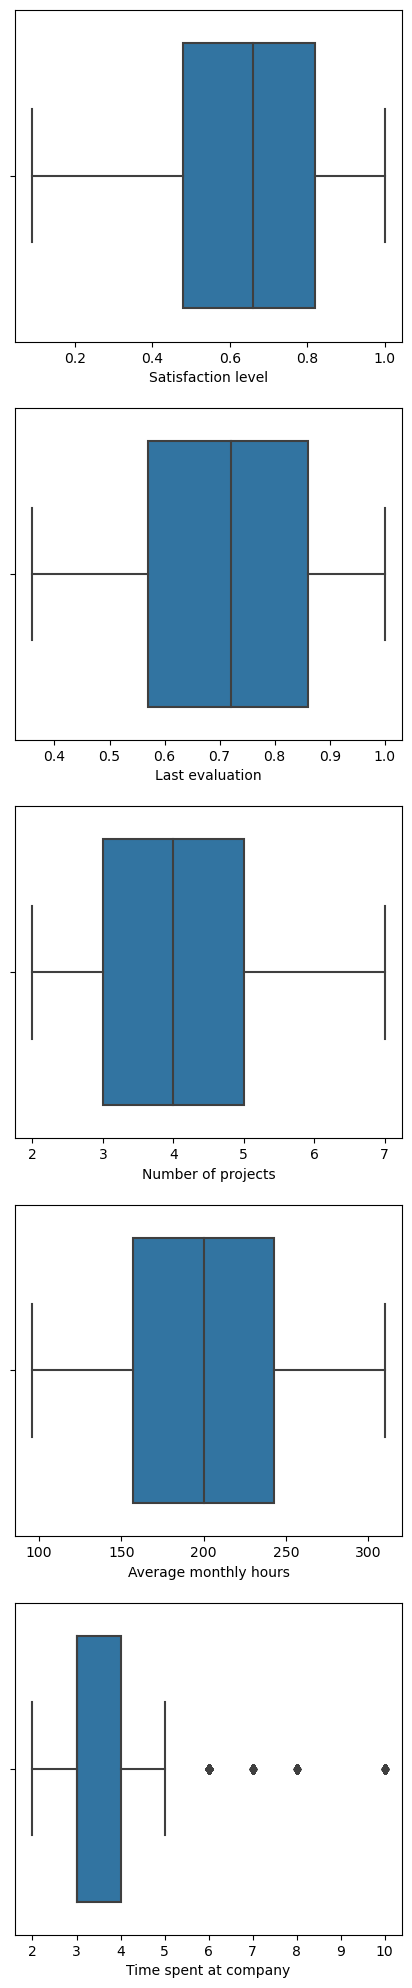

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots(5,1,figsize=(5,25))
sns.boxplot(data=df_cleaned_encoded,x="satisfaction_level",ax=ax[0])
ax[0].set_xlabel("Satisfaction level")

sns.boxplot(data=df_cleaned_encoded,x="last_evaluation",ax=ax[1])
ax[1].set_xlabel("Last evaluation")

sns.boxplot(data=df_cleaned_encoded,x="number_projects",ax=ax[2])
ax[2].set_xlabel("Number of projects")

sns.boxplot(data=df_cleaned_encoded,x="average_monthly_hours",ax=ax[3])
ax[3].set_xlabel("Average monthly hours")

sns.boxplot(data=df_cleaned_encoded,x="time_spend_company",ax=ax[4])
ax[4].set_xlabel("Time spent at company")

plt.show()

From the above we note that there are outliers in the time spent at the company. We keep this in mind for later when we build models, as some models are more sensitive to outliers. We do, however, want to check how many outliers there are compared to the size of the data set. 

In [15]:
#Create quantiles 
Q1 = df_cleaned_encoded["time_spend_company"].quantile(0.25)
Q3 = df_cleaned_encoded["time_spend_company"].quantile(0.75)

#Inter quantile range
IQR = Q3-Q1

#Define an outlier to be 1 times the interquartile range above Q3/below Q2
upper_limit = Q3+1.*IQR
lower_limit = Q1-1.*IQR

outliers = df_cleaned_encoded[(df_cleaned_encoded["time_spend_company"]<lower_limit)
                              |(df_cleaned_encoded["time_spend_company"]>upper_limit)]

print("Number of outliers with cutoff at 1*IQR on each side:")
print(str(outliers.count()[0])+" or "+str(round(outliers.count()[0]/df_cleaned_encoded.shape[0]*100,2))+"%")
print("The considered intervall corresponds to a range ["+str(lower_limit)+","+str(upper_limit)+"]")

Number of outliers with cutoff at 1*IQR on each side:
824 or 6.87%
The considered intervall corresponds to a range [2.0,5.0]


Next, we want to get a feel for how many people stay or leave:

In [16]:
#print("Percentage that stayed at company "+str(df_cleaned_encoded[df_cleaned_encoded["left"]==0].value_counts()))
stayed,left = df_cleaned_encoded["left"].value_counts()
print("Percentage that stayed: "+str(round(stayed/df_cleaned_encoded.shape[0]*100,2)))
print("Percentage that left: "+str(round(left/df_cleaned_encoded.shape[0]*100,2)))

Percentage that stayed: 83.4
Percentage that left: 16.6


We proceed to plot histograms of people who quit vs a few metrics. Let us start with "satisfaction_level":

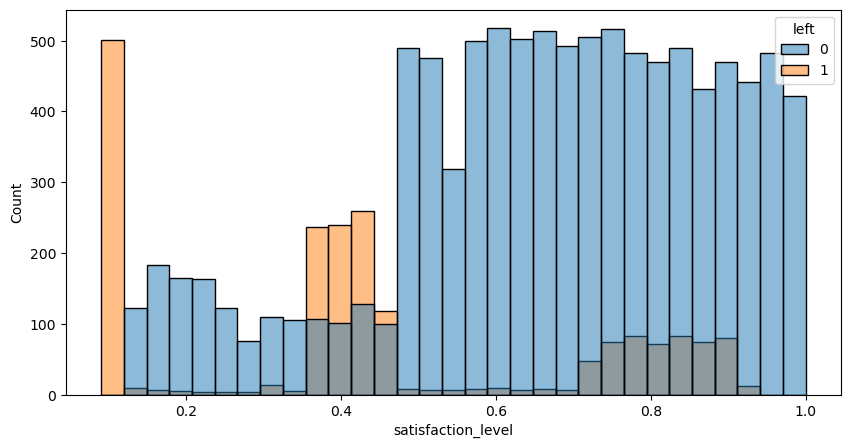

In [17]:
fig,ax=plt.subplots(figsize=(10,5))
sns.histplot(data=df_cleaned_encoded,x="satisfaction_level",hue="left")
plt.show()

The first thing we note, is that there seem to be a correlation between satisfaction level and how many people left the company, which seems reasonable. Forthermore, it seems it might be benefitial to split satisfaction into a categorical value, as the satisfaction level of the people that left seem to be "clumped" around 0, 0.4 and 0.8. We will define the levels as follows:

satisfaction_level_categorical:

    low = [0,0.3]

    average = (0.3,0.6]

    high = (0.6,1]

In [27]:
df_cleaned_encoded["satisfaction_level_categorical"]=pd.cut(df_cleaned_encoded["satisfaction_level"]
                                                      ,bins=[0,0.3,0.6,1]
                                                      ,labels=[0,1,2]
                                                      ,include_lowest=True)

df_cleaned_encoded.head(10)

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5_years,salary,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,satisfaction_level_encoded,last_evaluation_catecorical,satisfaction_level_categorical
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
1,0.80,0.86,5,262,6,0,1,0,1,0,...,0,0,0,0,1,0,0,2,0,2
2,0.11,0.88,7,272,4,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,2,0,2
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
5,0.41,0.50,2,153,3,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
6,0.10,0.77,6,247,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,0.92,0.85,5,259,5,0,1,0,0,0,...,0,0,0,0,1,0,0,2,0,2
8,0.89,1.00,5,224,5,0,1,0,0,0,...,0,0,0,0,1,0,0,2,0,2
9,0.42,0.53,2,142,3,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1


Next we consider the "last_evaluation" column:

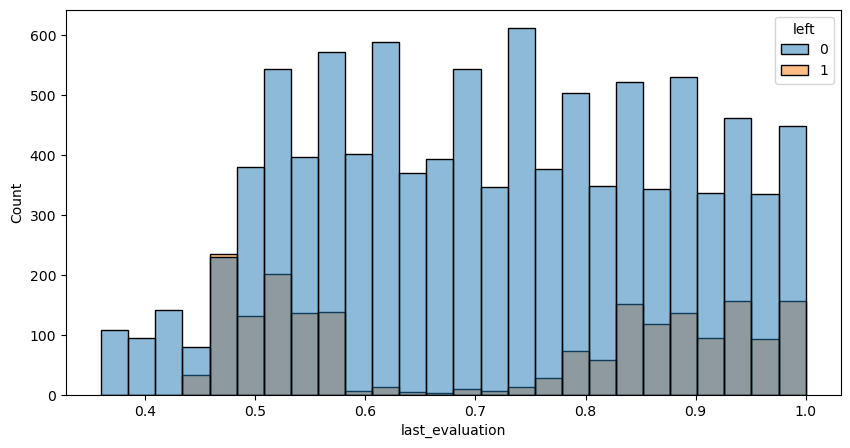

In [28]:
fig,ax=plt.subplots(figsize=(10,5))
sns.histplot(data=df_cleaned_encoded,x="last_evaluation",hue="left")
plt.show()

We notice a trend where people that have high evaluations leave. This might be due to highly qualified individuals searching for better opportunities. In a similar way, people with low performance review seem to leave as well, which can mean that they are fired. Interestingly, the lowest performance reviews seem to stay. It does, however, seem that people with an evaluation in the range [0.6,0.75] are most likely to stay. Let us try to include a new categorical value that is 1 if "last_eval" is in this range and 0 otherwise. 

In [29]:
df_cleaned_encoded["last_evaluation_catecorical"]=pd.cut(df_cleaned_encoded["last_evaluation"]
                                                            ,bins=[0,0.6,0.75,1]
                                                            ,labels=[0,1,0]
                                                            ,include_lowest=True
                                                            ,ordered=False)

df_cleaned_encoded.sample(10,random_state=11)

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5_years,salary,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,satisfaction_level_encoded,last_evaluation_catecorical,satisfaction_level_categorical
4524,0.78,0.59,4,180,3,0,0,0,0,0,...,0,0,0,0,1,0,0,2,0,2
5867,0.61,0.90,3,263,3,0,0,0,1,0,...,0,0,0,0,0,0,0,2,0,2
2597,0.56,0.92,4,172,2,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
3916,0.25,0.97,3,158,3,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9391,0.62,0.63,5,153,6,0,0,0,1,0,...,0,0,0,0,0,0,1,2,1,2
7963,0.21,0.76,6,219,4,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
10140,0.80,0.98,3,189,6,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,2
11806,0.64,0.94,4,210,3,0,0,0,0,0,...,0,0,0,1,0,0,0,2,0,2
5350,0.45,0.72,4,149,3,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,1
4194,0.59,0.90,3,146,3,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,1


Next we investigate the number of projects column:

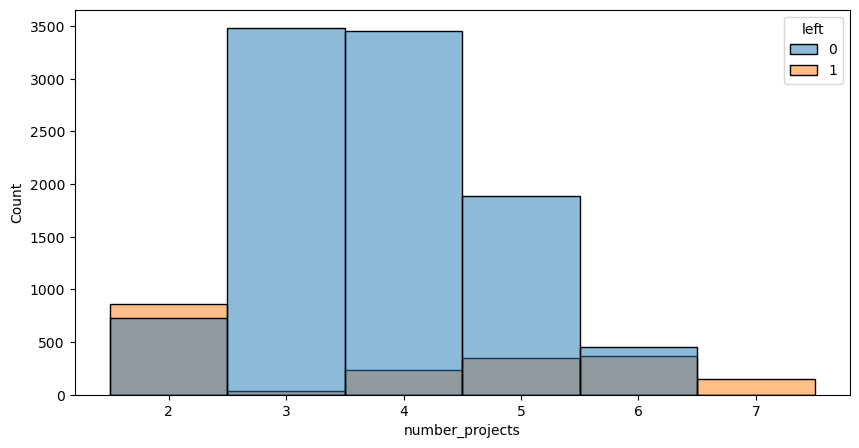

In [30]:
fig,ax=plt.subplots(figsize=(10,5))
sns.histplot(data=df_cleaned_encoded,x="number_projects",hue="left",discrete=True)
plt.show()

There seem to be a similar correlation as we saw for the last evaluation. Either too many or too few projects result in leaving. To make this clearer, let us look at the percentage of people with a certain number of projects leaving. To do so, we first create a new column "percentage_left_per_project"

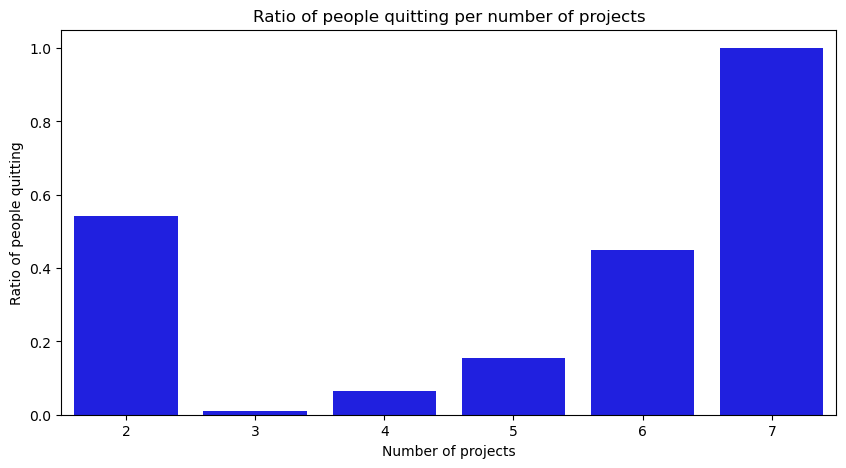

In [35]:
#count number of people with a given number of projects
people_per_project_count = df_cleaned_encoded["number_projects"].value_counts().reset_index().sort_values(by="index").rename(columns={"index":"number_projects","number_projects":"counts"})
people_per_project_count = people_per_project_count.reset_index(drop=True)

#count number of people leaving with a given number of projects
people_per_project_count_quit = df_cleaned_encoded[df_cleaned_encoded["left"]==1].reset_index()
people_per_project_count_quit = people_per_project_count_quit["number_projects"].value_counts().reset_index().sort_values(by="index").rename(columns={"index":"number_projects","number_projects":"counts_left"})
people_per_project_count_quit = people_per_project_count_quit.reset_index(drop=True)

#Compute the ratio and save as a dataframe
ratio_quit_per_project_count = (people_per_project_count_quit["counts_left"]/people_per_project_count["counts"]).reset_index().rename(columns={"index":"number_projects",0:"ratio"})

fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=ratio_quit_per_project_count,x="number_projects",y="ratio",color="blue")
ax.set_xlabel("Number of projects")
ax.set_ylabel("Ratio of people quitting")
ax.set_title("Ratio of people quitting per number of projects")
ax.set_xticks([0,1,2,3,4,5],[2,3,4,5,6,7])
plt.show()

As we see, there is a clear trend that more projects mean higher chance of quiting, except if the emplyee has 2 projects. This might mean that the people with 2 projects have already quit, and thus are wrapping up projects, or they were fired for not doing enough, or had already planned to quit and thus did not work many projects. For this reason I include a catagorical variable "2_projects", which is 1 of the person has 2 projects, and 0 if the person has more than zero projects. 

In [45]:
df_cleaned_encoded["2_projects"]=df_cleaned_encoded["number_projects"].replace({2:1,3:0,4:0,5:0,6:0,7:0})
df_cleaned_encoded.head(10)

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5_years,salary,department_RandD,...,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,satisfaction_level_encoded,last_evaluation_catecorical,satisfaction_level_categorical,2_projects
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,1
1,0.80,0.86,5,262,6,0,1,0,1,0,...,0,0,0,1,0,0,2,0,2,0
2,0.11,0.88,7,272,4,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,1,0,0,2,0,2,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,1
5,0.41,0.50,2,153,3,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,1
6,0.10,0.77,6,247,4,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,0.92,0.85,5,259,5,0,1,0,0,0,...,0,0,0,1,0,0,2,0,2,0
8,0.89,1.00,5,224,5,0,1,0,0,0,...,0,0,0,1,0,0,2,0,2,0
9,0.42,0.53,2,142,3,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,1


Furthermore, it looks like the ratio of quitters per number of projects increses exponentially (when number of projects is not 2). Let us check by plotting the plot above on a log scale: 

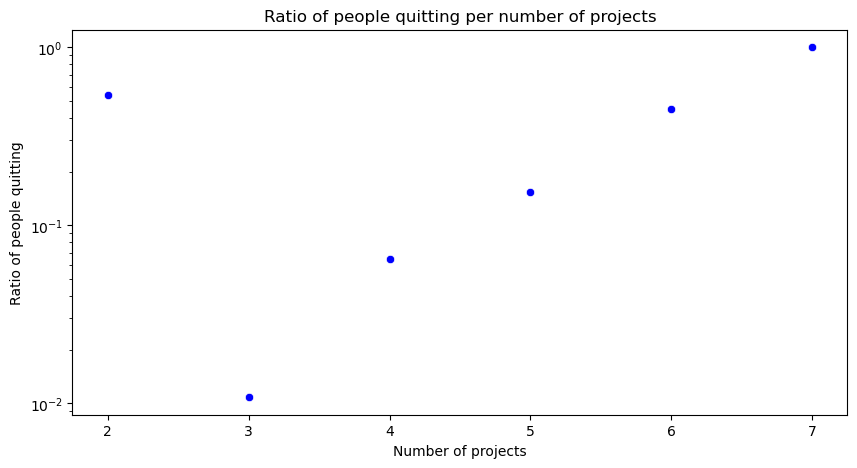

In [46]:
fig,ax=plt.subplots(figsize=(10,5))
sns.scatterplot(data=ratio_quit_per_project_count,x="number_projects",y="ratio",color="blue")
ax.set_xlabel("Number of projects")
ax.set_ylabel("Ratio of people quitting")
ax.set_title("Ratio of people quitting per number of projects")
ax.set_xticks([0,1,2,3,4,5],[2,3,4,5,6,7])
ax.set_yscale("log")
plt.show()

This seems to confirm the notion that there is an approximate linear relationship for number of projects larger than 2 and the log of the ratio of people quitting. Let us make a new variable that is the log of the ratio of people quitting per number of projects

In [85]:
#Reassign the log of the ratio to a new variable temp
temp = ratio_quit_per_project_count["ratio"].aggregate("log")
#Find min and max values of the ratio
max_val = temp.max()
min_val = temp.min()
#Scale the values so they are between 0 and 1
temp = (temp-min_val)/(max_val-min_val)
df_cleaned_encoded["ratio_quit_per_number_projects"] = df_cleaned_encoded["number_projects"].replace({2:temp[0],3:temp[1],4:temp[2],5:temp[3],6:temp[4],7:temp[5]})
df_cleaned_encoded.head(10)

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5_years,salary,department_RandD,...,department_marketing,department_product_mng,department_sales,department_support,department_technical,satisfaction_level_encoded,last_evaluation_catecorical,satisfaction_level_categorical,2_projects,ratio_quit_per_number_projects
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,1,0,0,1,0,1,1,0.864637
1,0.80,0.86,5,262,6,0,1,0,1,0,...,0,0,1,0,0,2,0,2,0,0.586327
2,0.11,0.88,7,272,4,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1.000000
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,1,0,0,2,0,2,0,0.586327
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,1,0,0,1,0,1,1,0.864637
5,0.41,0.50,2,153,3,0,1,0,0,0,...,0,0,1,0,0,1,0,1,1,0.864637
6,0.10,0.77,6,247,4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0.823259
7,0.92,0.85,5,259,5,0,1,0,0,0,...,0,0,1,0,0,2,0,2,0,0.586327
8,0.89,1.00,5,224,5,0,1,0,0,0,...,0,0,1,0,0,2,0,2,0,0.586327
9,0.42,0.53,2,142,3,0,1,0,0,0,...,0,0,1,0,0,1,0,1,1,0.864637


We continue looking at the number of hours spent at the company:

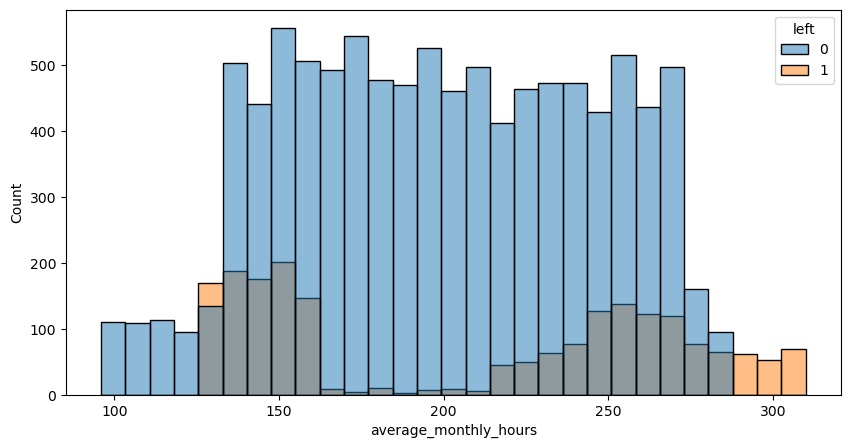

In [88]:
fig,ax=plt.subplots(figsize=(10,5))
sns.histplot(data=df_cleaned_encoded,x="average_monthly_hours",hue="left")
plt.show()

Again, there looks like those that quit either work the most, or the least. We should suspect that the number of hours is somewhat related to the number of projects. Let us look at that:

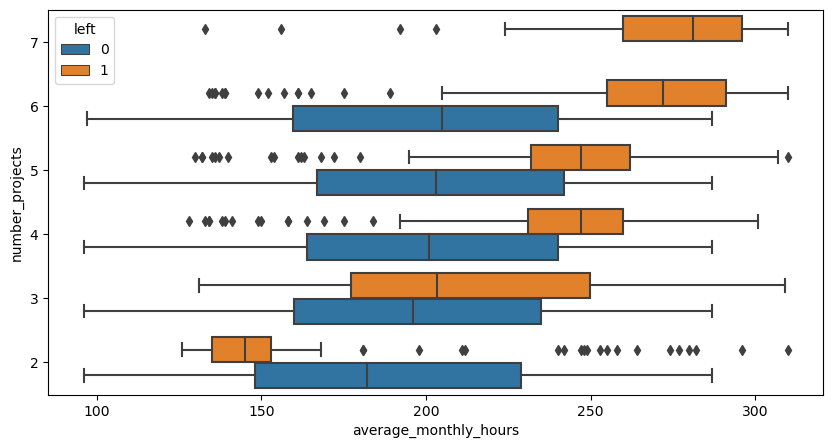

In [94]:
fig,ax=plt.subplots(figsize=(10,5))
sns.boxplot(data=df_cleaned_encoded,x="average_monthly_hours",y="number_projects",hue="left",orient="h")
ax.invert_yaxis()
plt.show()

It seems that those that stayed worked a similar amout of time regardless of the number of projects. while those that left either worked too much or too little. Note that some worked 300+ hours a month, which is about 67+ hours per week. This is huge compared to the standard 40 hours a week. 

We proceed looking at the time spent at the company and their salary, and the time spent at the company and recent promotions

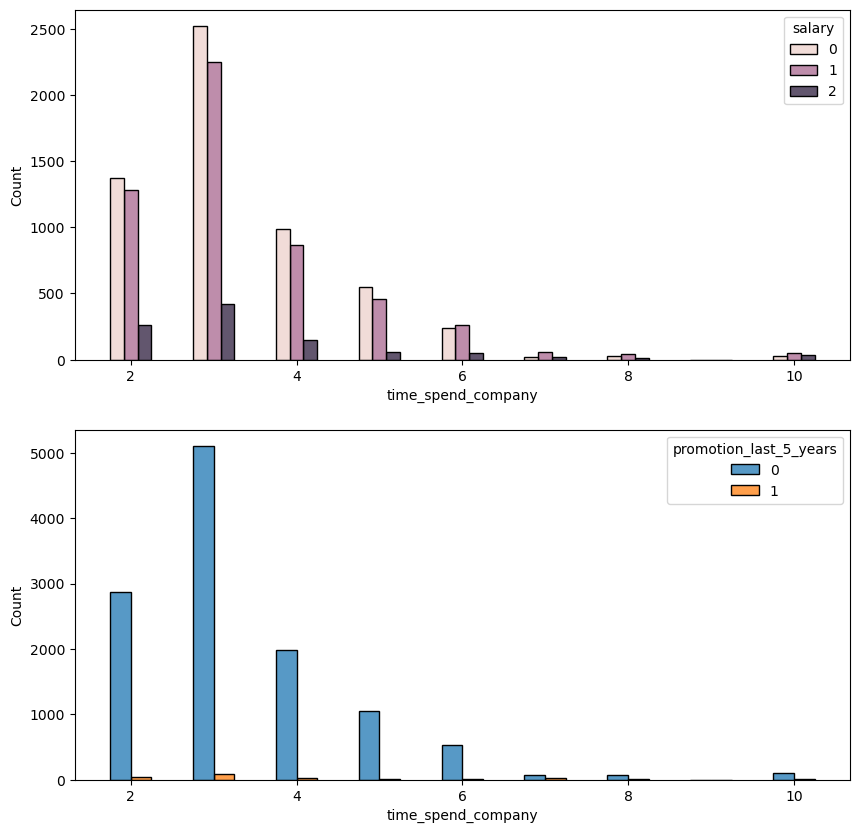

In [119]:
fig,ax = plt.subplots(2,1,figsize=(10,10))
sns.histplot(data=df_cleaned_encoded,x="time_spend_company",hue="salary",hue_order=["low","medium","high"],multiple="dodge",discrete=True,ax=ax[0],shrink=0.5)
sns.histplot(data=df_cleaned_encoded,x="time_spend_company",hue="promotion_last_5_years",discrete=True,ax=ax[1],multiple="dodge",shrink=0.5)
plt.show()

It seems that there are higher pay for larger percentage of people with more tenure. It also seems there is a higher probability of being promoted the more time is spent at the company, although this figure is not conclusive.

Last we check if the number of accidents have an impact on leaving, and which department we are in:

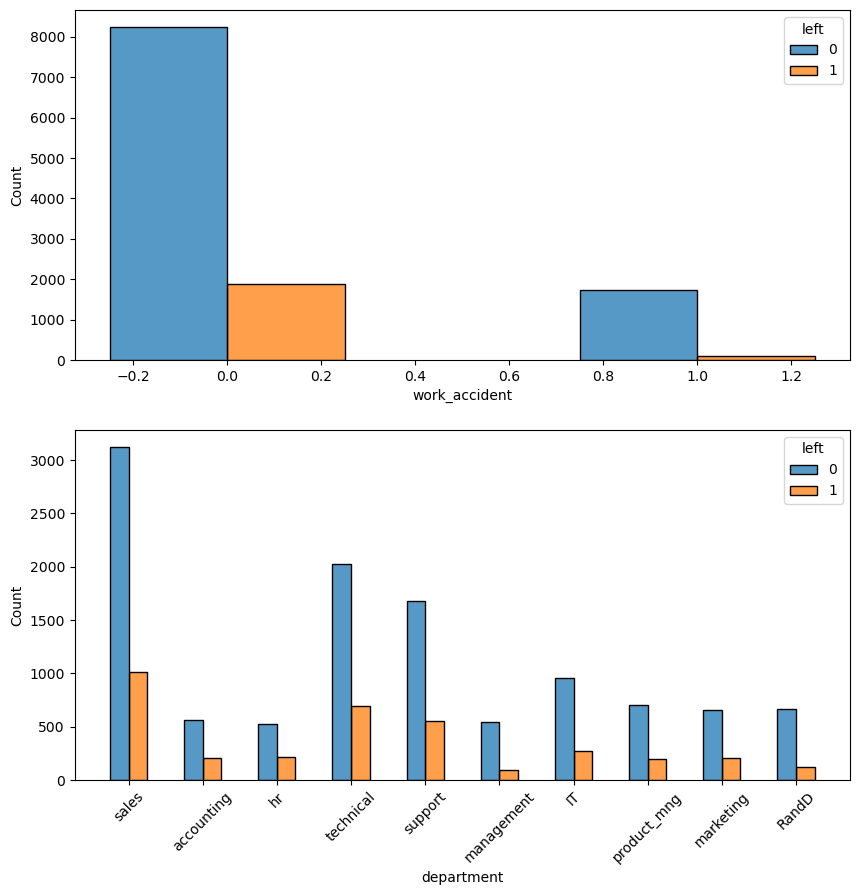

In [159]:
fig,ax = plt.subplots(2,1,figsize=(10,10))
sns.histplot(data=df_cleaned_encoded,x="work_accident",hue="left",multiple="dodge",discrete=True,shrink=0.5,ax=ax[0])
sns.histplot(data=df_cleaned,x="department",hue="left",multiple="dodge",discrete=True,shrink=0.5,ax=ax[1])
ax[1].tick_params(axis='x', rotation=45)
plt.show()

Departments or work accedents does not seem to have much impact, although we do note the turnover in HR is quite large. 

We have looked at a lot of different data, let us now use these insights to start building the model. Let us summarize the importent aspects:

It seems the main reason for quitting is related to mismanaged amount of work. Therefore work hours and number of projects are important variables. However, they are related, and we should include a interaction term between if we are to use linear regression. In addition, last evaluation and satisfaction are important metrics. We can start with these variables and see if it makes a reasonable model. We will start with logistic regression.

Let us first investigate which of the numeric entries are strongly corrolated: 

In [170]:
df_cleaned_encoded.columns

Index(['satisfaction_level', 'last_evaluation', 'number_projects',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5_years', 'salary', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical',
       'satisfaction_level_encoded', 'last_evaluation_catecorical',
       'satisfaction_level_categorical', '2_projects',
       'ratio_quit_per_number_projects'],
      dtype='object')

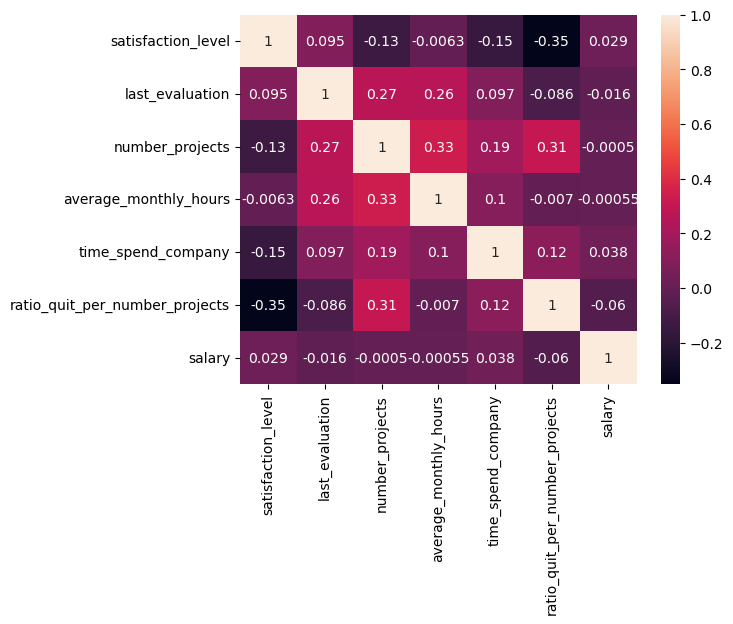

In [173]:


sns.heatmap(df_cleaned_encoded[["satisfaction_level"
                                ,"last_evaluation"
                                ,"number_projects"
                                ,"average_monthly_hours"
                                ,"time_spend_company"
                                ,"ratio_quit_per_number_projects"
                                ,"salary"]].corr(),annot=True)
plt.show()

For our model, let us decide first to use the variables 

ratio_quit_per_number_projects: The ratio of people that quit in relation to how many projects

satisfaction_level_categorical

last_evaluation_categorical

work_accident

department

average_monthly_hours

time_spend_company

In [482]:
#Remove colums not used in regression
df_logreg = df_cleaned_encoded.copy()
df_logreg = df_logreg.drop(columns=["salary","satisfaction_level","satisfaction_level_encoded","2_projects","last_evaluation","number_projects"])
df_logreg.head(10)

,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5_years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,last_evaluation_catecorical,satisfaction_level_categorical,ratio_quit_per_number_projects
0,157,3,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0.864637
1,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,2,0.586327
2,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1.000000
3,223,5,0,1,0,0,0,0,0,0,0,1,0,0,0,2,0.586327
4,159,3,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0.864637
5,153,3,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0.864637
6,247,4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.823259
7,259,5,0,1,0,0,0,0,0,0,0,1,0,0,0,2,0.586327
8,224,5,0,1,0,0,0,0,0,0,0,1,0,0,0,2,0.586327
9,142,3,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0.864637


In [483]:
#Create X and y variables
X_logreg = df_logreg.drop(columns=["left"])
y_logreg = df_logreg["left"]

In [484]:
#Import logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#split data in test and trainig set
X_logreg_train,X_logreg_test,y_logreg_train,y_logreg_test = train_test_split(X_logreg
                                                                             ,y_logreg
                                                                             ,stratify=y_logreg
                                                                             ,train_size=0.75
                                                                             ,random_state=42)

In [485]:
#Create model
logreg_model = LogisticRegression(random_state=42,max_iter=1000).fit(X_logreg_train,y_logreg_train)

In [486]:
#make prediction to test 
y_logreg_pred = logreg_model.predict(X_logreg_test)

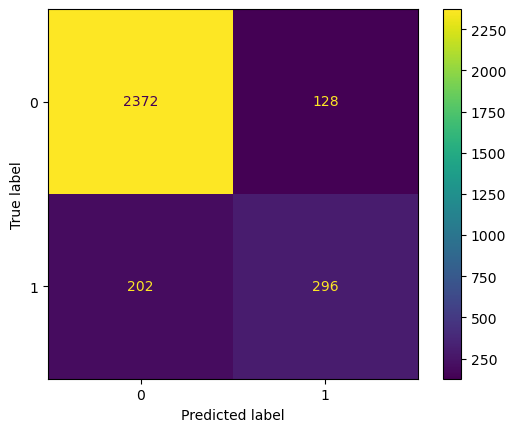

In [487]:
#Make confusion matrix to check model
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
logreg_cm = confusion_matrix(y_logreg_test, y_logreg_pred, labels=logreg_model.classes_)
logreg_disp = ConfusionMatrixDisplay(confusion_matrix=logreg_cm)
logreg_disp.plot()
plt.show()

We are mostly important in the lower right quadrant, as this is where we predict a member wants to leave correctly. In other words, we are most interested in true positives. Let us check some metrics:

In [488]:
from sklearn.metrics import classification_report
target_names = ['Predicted to not leave', 'Predicted to leave']
print(classification_report(y_logreg_test, y_logreg_pred, target_names=target_names))

                        precision    recall  f1-score   support

Predicted to not leave       0.92      0.95      0.93      2500
    Predicted to leave       0.70      0.59      0.64       498

              accuracy                           0.89      2998
             macro avg       0.81      0.77      0.79      2998
          weighted avg       0.88      0.89      0.89      2998



Our precision finding people that will leave is at 70%. Note, however, that there were some outliers in the time spent at company column. Let us remove them and see if this improves our result

In [495]:
#Remove lines where years spent at company is 5 or above
df_logreg_2 = df_logreg[df_logreg["time_spend_company"]<=5]
X_logreg_2 = df_logreg_2.drop(columns=["left"])
y_logreg_2 = df_logreg_2["left"]

In [506]:
#split data in test and trainig set
X_logreg_train_2,X_logreg_test_2,y_logreg_train_2,y_logreg_test_2 = train_test_split(X_logreg_2
                                                                             ,y_logreg_2
                                                                             ,stratify=y_logreg_2
                                                                             ,train_size=0.75
                                                                             ,random_state=42)

In [507]:
#Create model
logreg_model_2 = LogisticRegression(random_state=42,max_iter=1000).fit(X_logreg_train_2,y_logreg_train_2)

#make prediction to test 
y_logreg_pred_2 = logreg_model_2.predict(X_logreg_test_2)

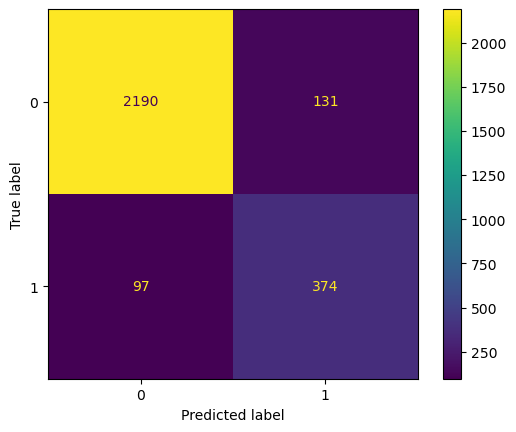

In [508]:
#Make confusion matrix to check model
logreg_cm_2 = confusion_matrix(y_logreg_test_2, y_logreg_pred_2, labels=logreg_model_2.classes_)
logreg_disp_2 = ConfusionMatrixDisplay(confusion_matrix=logreg_cm_2)
logreg_disp_2.plot()
plt.show()

In [509]:
print(classification_report(y_logreg_test_2, y_logreg_pred_2, target_names=target_names))

                        precision    recall  f1-score   support

Predicted to not leave       0.96      0.94      0.95      2321
    Predicted to leave       0.74      0.79      0.77       471

              accuracy                           0.92      2792
             macro avg       0.85      0.87      0.86      2792
          weighted avg       0.92      0.92      0.92      2792



Note how number of false negatives decresed, and the number of true positive increased. The prediciton of people leaving is now at 74%, while recall and f1-score increased significantly.